In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [19]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,NaN,NaN,NaN,NaN,2,7,8,2,9,11,NaN,7,NaN,NaN,NaN,6,NaN
1,NaN,NaN,NaN,NaN,5,5,9,6,4,8,NaN,9,NaN,NaN,NaN,10,NaN
2,NaN,NaN,NaN,NaN,4,8,8,5,10,11,NaN,8,NaN,NaN,NaN,10,NaN
3,4.0,9.0,5.0,7.0,4,7,7,13,1,7,6.0,8,3.0,8.0,0.0,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,3,4,10,7,8,12,NaN,9,NaN,NaN,NaN,6,NaN
19996,4.0,7.0,6.0,5.0,3,7,8,2,10,12,6.0,8,1.0,9.0,6.0,8,NaN
19997,4.0,8.0,4.0,6.0,4,7,8,7,4,10,7.0,6,3.0,9.0,3.0,7,NaN
19998,4.0,11.0,4.0,8.0,3,0,2,4,6,1,0.0,7,0.0,8.0,0.0,8,NaN


In [20]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	4000
float64		column 3	4000
float64		column 4	4000
int64		column 5	0
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	4000
int64		column 12	0
float64		column 13	4000
float64		column 14	4000
float64		column 15	4000
int64		column 16	0
float64		column 17	20000


In [21]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,16000.000000,16000.000000,16000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16000.000000,20000.000000,16000.000000,16000.000000,16000.000000,20000.00000,0.0
mean,4.021687,7.023375,5.132500,5.351250,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.515313,7.929000,3.084312,8.359063,3.718125,7.80120,NaN
std,1.897681,3.283272,1.987037,2.247068,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.572704,2.080619,2.322723,1.531146,2.558995,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

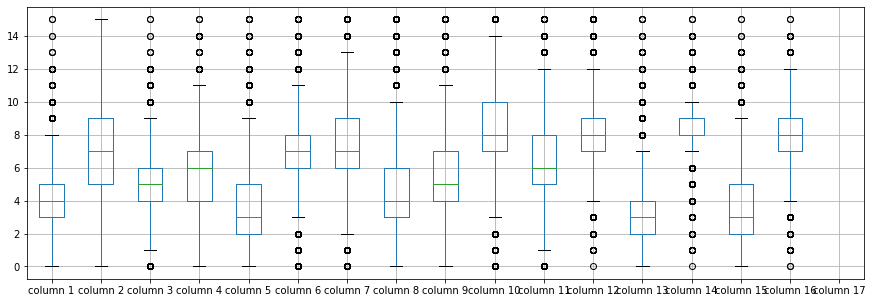

In [22]:
df.boxplot(return_type='axes', figsize=(15,5))

In [23]:
df.mean()

column 1     4.021687
column 2     7.023375
column 3     5.132500
column 4     5.351250
column 5     3.505850
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.515313
column 12    7.929000
column 13    3.084312
column 14    8.359063
column 15    3.718125
column 16    7.801200
column 17         NaN
dtype: float64

In [24]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.758982,0.849434,0.671327,0.612340,-0.045842,0.037753,0.009017,0.034651,0.135124,0.033891,-0.050948,0.487843,0.101370,0.255990,-0.128295,NaN
column 2,0.758982,1.000000,0.673925,0.823785,0.554956,0.034907,-0.039162,-0.032381,0.073074,0.147411,-0.050308,-0.021038,0.280168,0.005765,0.216955,-0.065083,NaN
column 3,0.849434,0.673925,1.000000,0.659354,0.759968,0.047459,0.016832,-0.105977,0.046249,0.100328,0.013591,-0.046027,0.555388,0.048890,0.239227,-0.141565,NaN
column 4,0.671327,0.823785,0.659354,1.000000,0.644819,0.032439,-0.016261,0.072289,0.034893,-0.000090,-0.004952,0.012107,0.270505,0.029540,0.287345,-0.039421,NaN
column 5,0.612340,0.554956,0.759968,0.644819,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.080468,-0.038858,0.627021,0.018949,0.482003,-0.062969,NaN
column 6,-0.045842,0.034907,0.047459,0.032439,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.372406,-0.032115,0.134908,-0.248776,0.127475,0.248816,NaN
column 7,0.037753,-0.039162,0.016832,-0.016261,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.584106,-0.271649,-0.064280,0.548744,-0.109742,-0.207900,NaN
column 8,0.009017,-0.032381,-0.105977,0.072289,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.039931,0.082020,0.151069,-0.081366,0.002900,0.182902,NaN
column 9,0.034651,0.073074,0.046249,0.034893,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.059265,0.119048,-0.387302,-0.059701,0.266426,-0.061335,NaN
column 10,0.135124,0.147411,0.100328,-0.000090,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.032851,-0.106759,-0.200875,0.026750,-0.115811,-0.114223,NaN


In [25]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [17,17+6,17+6+6,17+6+6+6,17+6+6,17+6,17], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 70.59028825378418


In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Letter_AL_20(imp).xlsx", index=False, header=False)